#### Import the libraries

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Input 
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

#### Load the data 

In [5]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

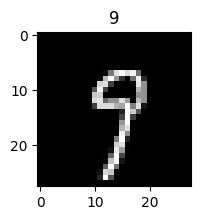

In [17]:
plt.figure(figsize=(2,2))
plt.title(y_train[1500])
plt.imshow(x_train[1500], cmap = 'gray')

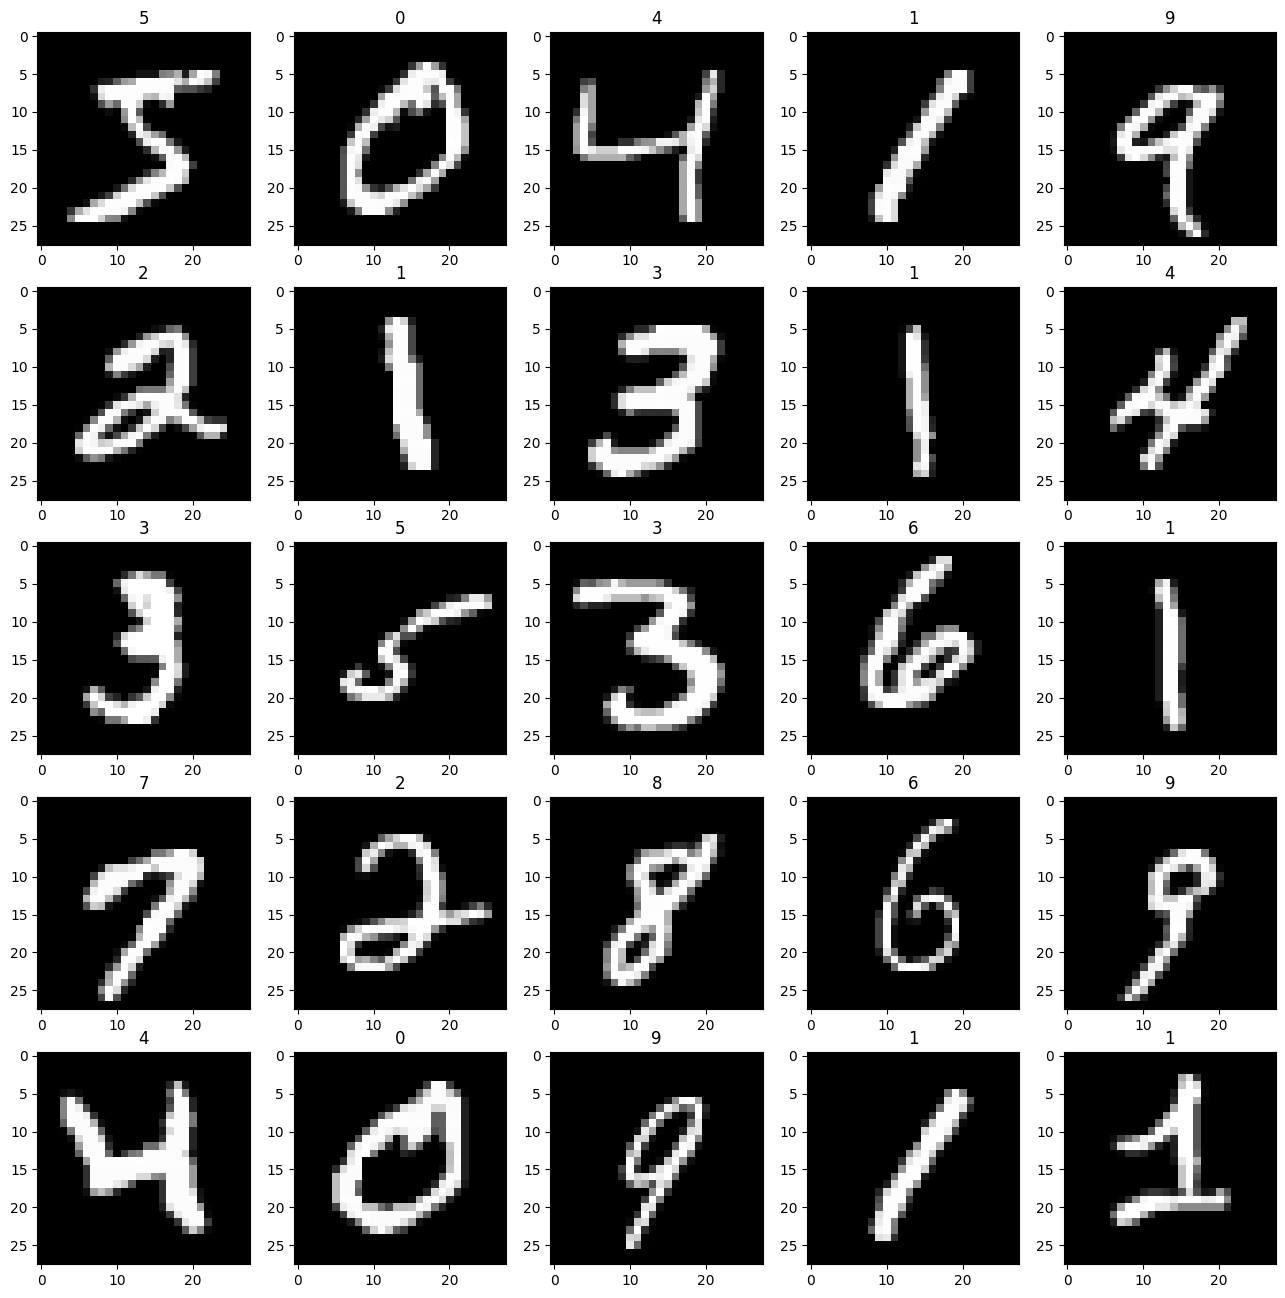

In [20]:
plt.figure(figsize=(16,16))
for i in range(25): 
    plt.subplot(5,5,i+1)
    plt.title(y_train[i])
    #plt.xticks([])
    #plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')

In [21]:
x = np.array([[5,4,3],[6,5,3]])

In [22]:
x

array([[5, 4, 3],
       [6, 5, 3]])

In [23]:
x.shape

(2, 3)

In [24]:
x.reshape(6)

array([5, 4, 3, 6, 5, 3])

In [26]:
x = x.flatten()

In [27]:
x.shape

(6,)

#### Image Preprocessing

In [30]:
size = x_train.shape[1] * x_train.shape[2]

In [31]:
size

784

In [32]:
x_train = x_train.reshape(-1, size)
x_test = x_test.reshape(-1, size)

In [33]:
x_train.shape

(60000, 784)

In [34]:
x_test.shape

(10000, 784)

In [65]:
x = np.array([[23,9,0],[12,31,15],[0,12,31],[31,0,13]])

In [66]:
x

array([[23,  9,  0],
       [12, 31, 15],
       [ 0, 12, 31],
       [31,  0, 13]])

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [68]:
x_scaled

array([[0.74193548, 0.29032258, 0.        ],
       [0.38709677, 1.        , 0.48387097],
       [0.        , 0.38709677, 1.        ],
       [1.        , 0.        , 0.41935484]])

In [69]:
x/31

array([[0.74193548, 0.29032258, 0.        ],
       [0.38709677, 1.        , 0.48387097],
       [0.        , 0.38709677, 1.        ],
       [1.        , 0.        , 0.41935484]])

In [70]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [71]:
dog = plt.imread('dog.jpg')

In [72]:
dog_scaled = dog / 255

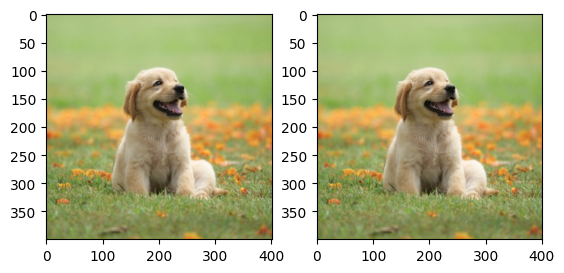

In [73]:
plt.subplot(121)
plt.imshow(dog)
plt.subplot(122)
plt.imshow(dog_scaled)

In [74]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<Axes: xlabel='count'>

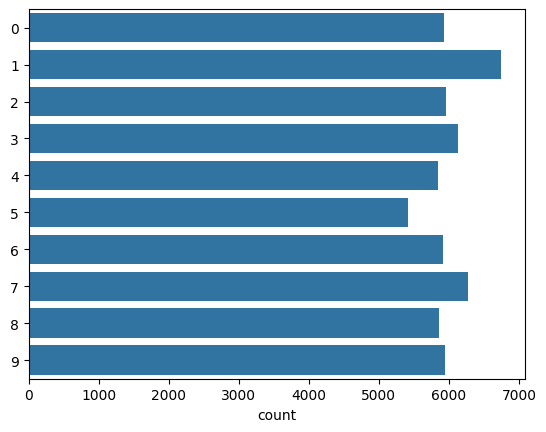

In [75]:
import seaborn as sns
sns.countplot(y = y_train)

In [76]:
y_train_new = to_categorical(y_train)

In [77]:
y_train_new.shape

(60000, 10)

In [78]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### Build the model

In [81]:
# Create the object of ANN 
model = Sequential()

# Add input layer 
model.add(Input((size,)))

# Add hidden layer -1
model.add(Dense(64, activation='relu'))

# Add hidden layer -2
model.add(Dense(128, activation='relu'))

# Add hidden layer -3
model.add(Dense(64, activation='relu'))

# Add output layer
model.add(Dense(10, activation='softmax'))

#### Compile the model

In [83]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#### Train the model

In [85]:
model.fit(x_train_scaled, y_train_new, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8857 - loss: 0.3742
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9644 - loss: 0.1171
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9740 - loss: 0.0842
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9797 - loss: 0.0646
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9821 - loss: 0.0569
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9849 - loss: 0.0486
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9853 - loss: 0.0446
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9865 - loss: 0.0409
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9893 - loss: 0.0328
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9904 - loss: 0.0296


In [86]:
y_test_new = to_categorical(y_test)

#### Evaluate the model on test dataset

In [88]:
model.evaluate(x_test_scaled, y_test_new, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 8s 818us/step - accuracy: 0.9717 - loss: 0.1298


[0.11327731609344482, 0.9753000140190125]

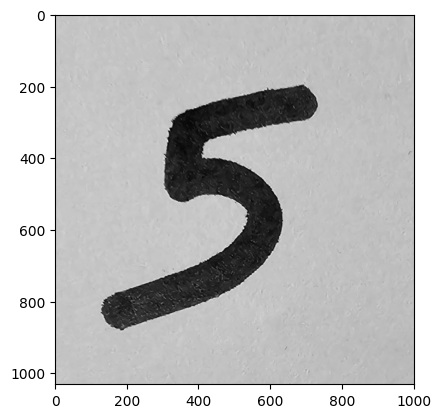

In [90]:
import cv2
newchar = cv2.imread('new-char1.jpg', 0) 
plt.imshow(newchar, cmap = 'gray')

In [95]:
newchar = cv2.imread('new-char1.jpg', 0)  # read 
newchar = cv2.resize(newchar,(28,28))  # resize
newchar = newchar.reshape(1,size)   # reshape
newchar = newchar / 255             # scale
result = model.predict(newchar, verbose=False)  # predict
result.argmax()

4

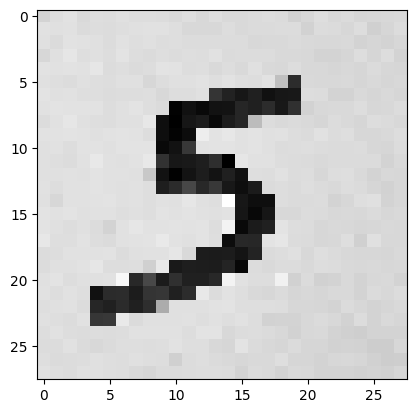

In [103]:
newchar = cv2.imread('new-char1.jpg', 0)  # read 
newchar = cv2.resize(newchar,(28,28))  # resize
plt.imshow(newchar, cmap = 'gray')

In [106]:
thresh, newimg = cv2.threshold(newchar, 128, 255, cv2.THRESH_BINARY_INV)

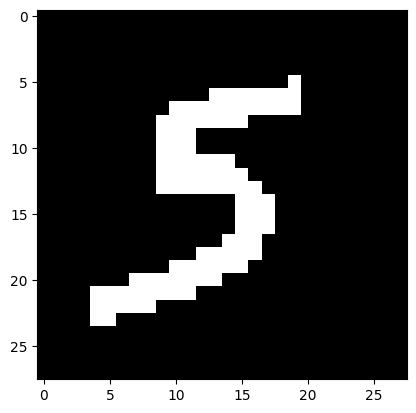

In [107]:
plt.imshow(newimg, cmap = 'gray')

In [108]:
newchar = cv2.imread('new-char1.jpg', 0)  # read 
newchar = cv2.resize(newchar,(28,28))  # resize
thresh, newchar = cv2.threshold(newchar, 128, 255, cv2.THRESH_BINARY_INV)
newchar = newchar.reshape(1,size)   # reshape
newchar = newchar / 255             # scale
result = model.predict(newchar, verbose=False)  # predict
result.argmax()

5